C:\Users\bteba\AppData\Local\Temp\ipykernel_17912\4032706158.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Close'][i-5] < data['Close'][i] and data['Close'][i+5] < data['Close'][i]:


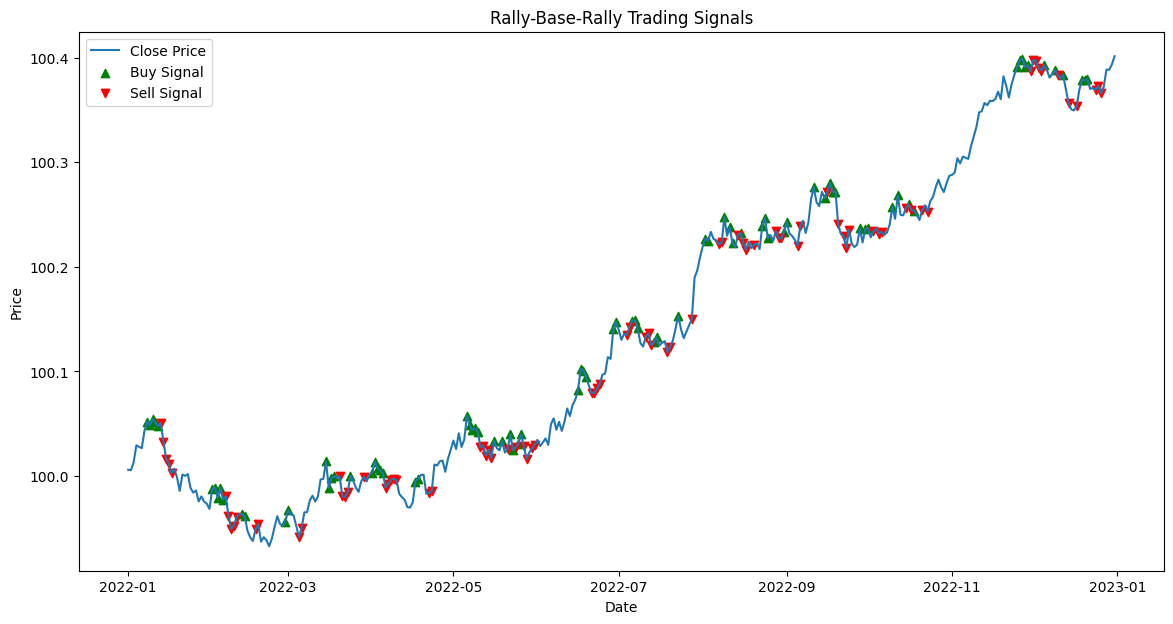

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducible results
dates = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
prices = np.random.normal(loc=0.001, scale=0.01, size=len(dates)).cumsum() + 100

data = pd.DataFrame(data={'Date': dates, 'Close': prices})
data.set_index('Date', inplace=True)




def find_rbr_signals(data):
    # Simplified criteria for Rally-Base-Rally detection
    rbr_signals = {'Buy': [], 'Sell': []}
  
  
# Identify Rally Days:
# A rally day is defined as a day where the stock’s closing price is higher than the closing prices of
# the five days before and five days after. This identifies a potential spike in price.

    for i in range(5, len(data) - 5):
        # Detect a base
        if data['Close'][i-5] < data['Close'][i] and data['Close'][i+5] < data['Close'][i]:
            # This is a Rally Day
            rbr_signals['Buy'].append(data.index[i])

# Identify Base Period: ?????????

# Second Rally Identification: ????????????

# Trading Signals: O sell esta erroneamente classificado, ele nao olha o periodo de base.

            if i + 10 < len(data):
               rbr_signals['Sell'].append(data.index[i+5])
    return rbr_signals

signals = find_rbr_signals(data)

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.scatter(signals['Buy'], data.loc[signals['Buy'], 'Close'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(signals['Sell'], data.loc[signals['Sell'], 'Close'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.title('Rally-Base-Rally Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:

# Identify Base Period:
# base period follows a rally, where the price does not exceed the high of the rally day for at least
# five consecutive days.


# Second Rally Identification:
# After a base period, identify another rally where the price exceeds the rally day’s high.


# Trading Signals:
# After a base period, identify another rally where the price exceeds the rally day’s high. Generate
# buy signals at the beginning of a base period and sell signals six days after a rally if no new highs
# are achieved.

            if i + 10 < len(data):
               rbr_signals['Sell'].append(data.index[i+5])
    return rbr_signals

signals = find_rbr_signals(data)

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.scatter(signals['Buy'], data.loc[signals['Buy'], 'Close'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(signals['Sell'], data.loc[signals['Sell'], 'Close'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.title('Rally-Base-Rally Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
